In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,5)

# load dataset (after you uploaded train.csv in Colab)
train_df = pd.read_csv('train.csv')

# quick head
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.info()

# Statistical summary for numeric columns
train_df.describe().T

# Check missing values
train_df.isnull().sum()

# Value counts for key categorical columns
print("Survived:\n", train_df['Survived'].value_counts())
print("\nPclass:\n", train_df['Pclass'].value_counts())
print("\nSex:\n", train_df['Sex'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Survived:
 Survived
0    549
1    342
Name: count, dtype: int64

Pclass:
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Sex:
 Sex
male      577
female    314
Name: count, dtype: int64


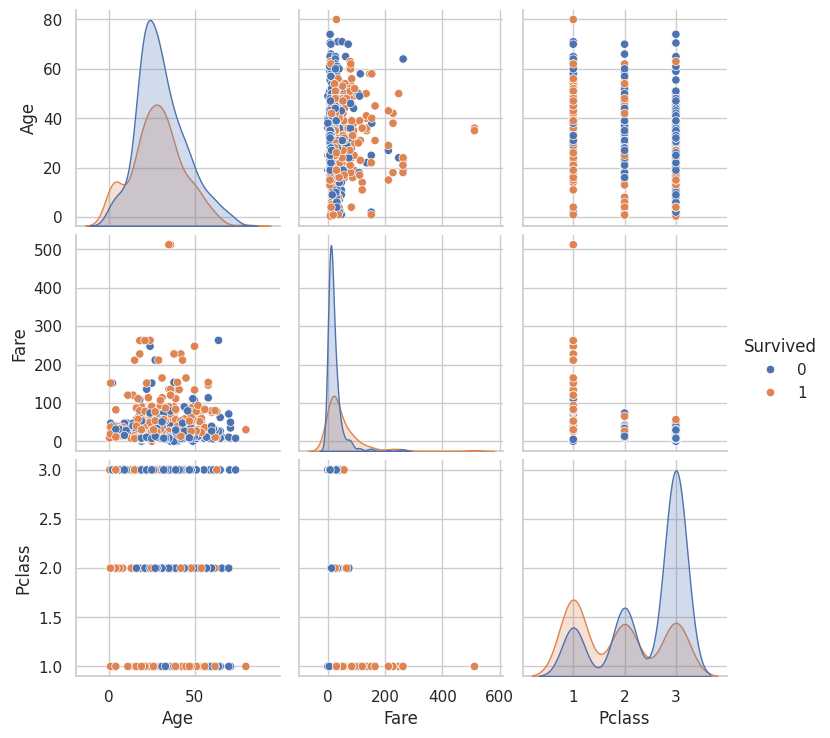

In [4]:
# pairplot (select important numeric columns)
sns.pairplot(train_df[['Age','Fare','Pclass','Survived']].dropna(), hue='Survived', diag_kind='kde')
plt.show()


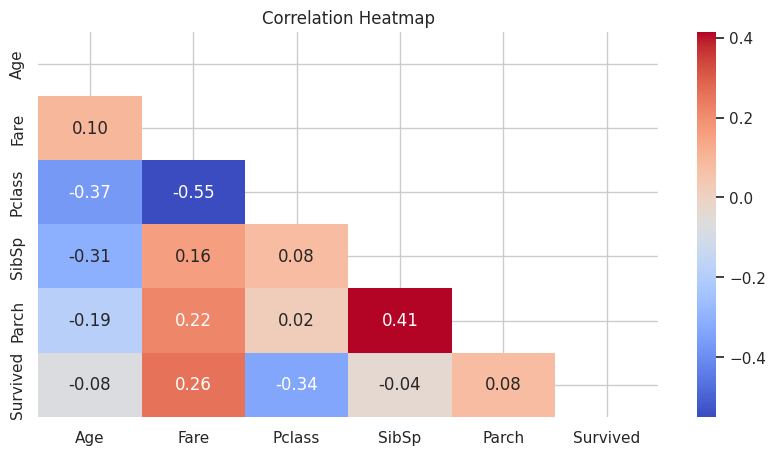

In [5]:
# correlation heatmap
corr = train_df[['Age','Fare','Pclass','SibSp','Parch','Survived']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [6]:
# Survival rate by Sex
print(train_df.groupby('Sex')['Survived'].mean())

# Survival rate by Pclass
print(train_df.groupby('Pclass')['Survived'].mean())

# Survival by Age group: create Age bins
bins = [0,12,20,40,60,100]
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins)
print(train_df.groupby('AgeGroup')['Survived'].mean())

# Cross-tab: Embarked vs Survived
print(pd.crosstab(train_df['Embarked'], train_df['Survived'], normalize='index'))


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64
AgeGroup
(0, 12]      0.579710
(12, 20]     0.381818
(20, 40]     0.397403
(40, 60]     0.390625
(60, 100]    0.227273
Name: Survived, dtype: float64
Survived         0         1
Embarked                    
C         0.446429  0.553571
Q         0.610390  0.389610
S         0.663043  0.336957


/tmp/ipython-input-4216661704.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(train_df.groupby('AgeGroup')['Survived'].mean())


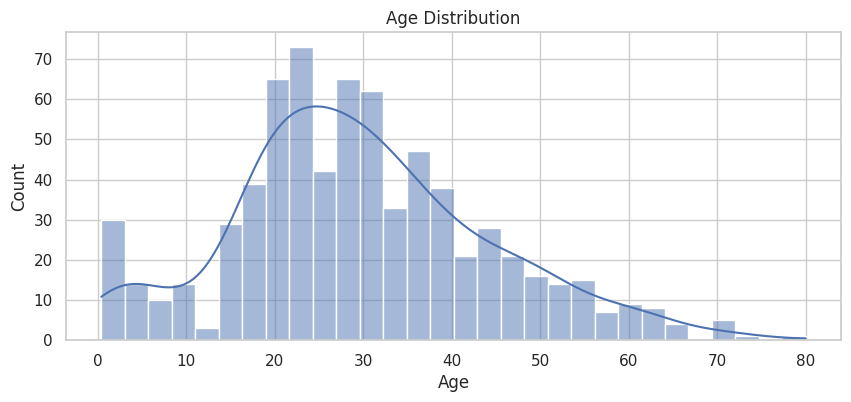

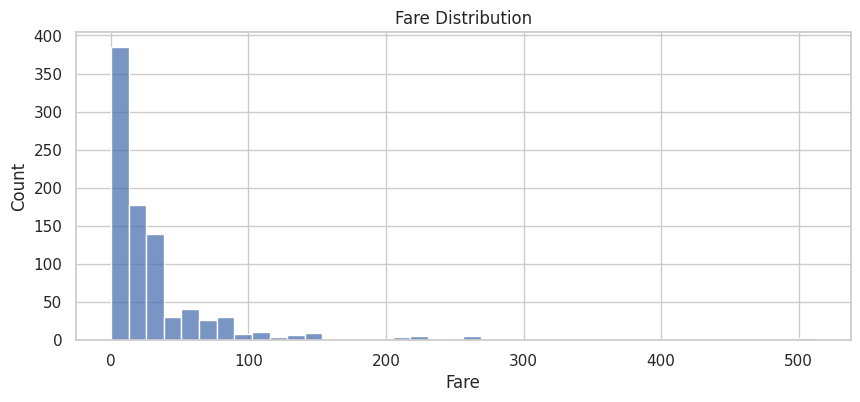

In [7]:
# Age histogram
plt.figure(figsize=(10,4))
sns.histplot(train_df['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

# Fare histogram (log scale if skewed)
plt.figure(figsize=(10,4))
sns.histplot(train_df['Fare'].dropna(), bins=40)
plt.title('Fare Distribution')
plt.show()


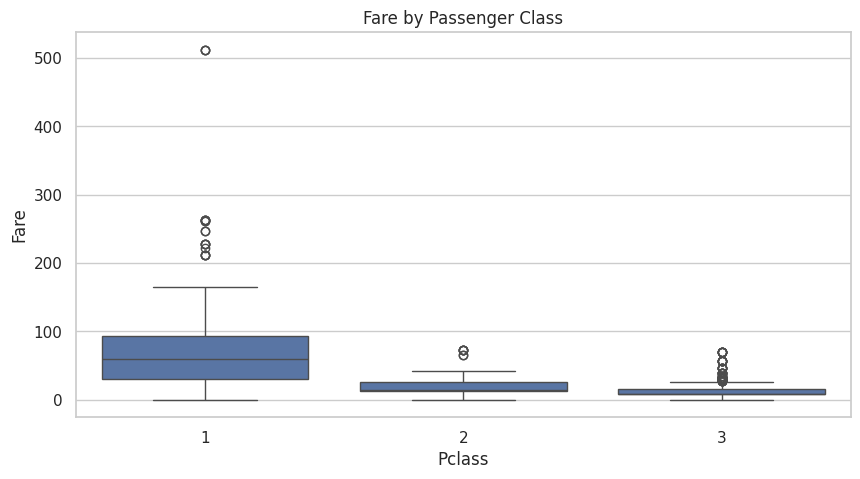

In [8]:
sns.boxplot(x='Pclass', y='Fare', data=train_df)
plt.title('Fare by Passenger Class')
plt.show()


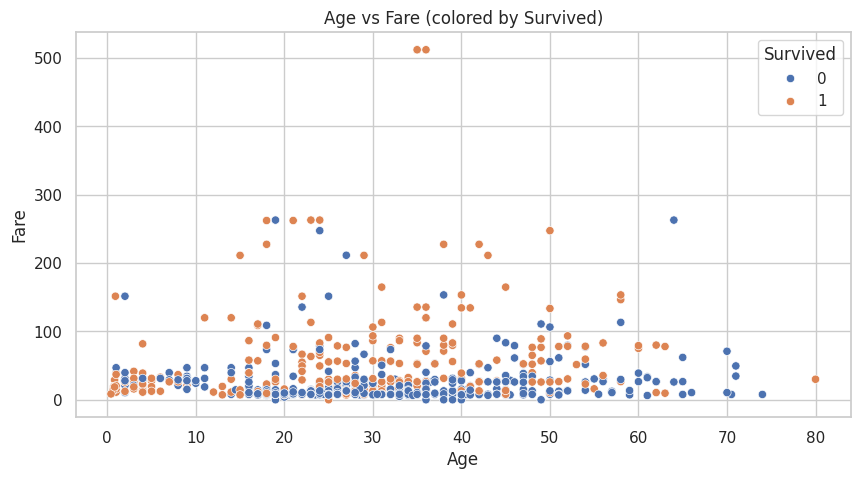

In [9]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_df)
plt.title('Age vs Fare (colored by Survived)')
plt.show()


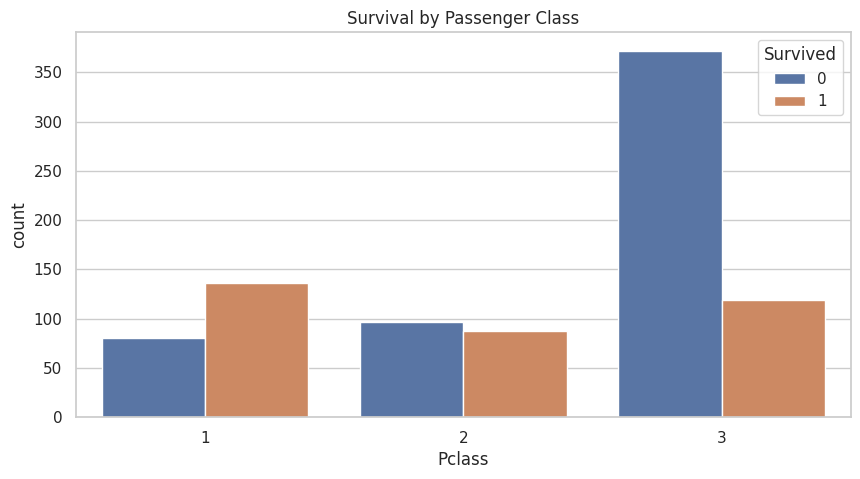

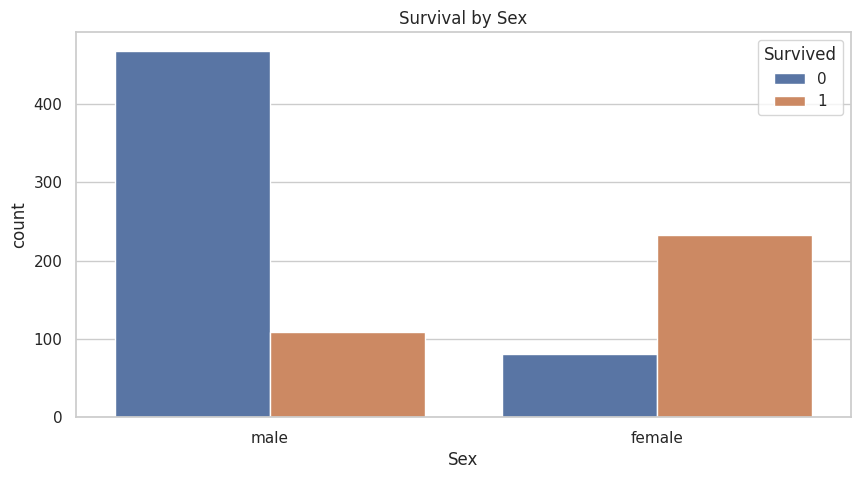

In [10]:
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Survival by Passenger Class')
plt.show()

sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Survival by Sex')
plt.show()
